# <h><center> ⭐️⭐️Tabular Playground Series May 2022⭐️⭐️ </center></h>

<center>
    <img src="https://assets.website-files.com/5ac6b7f2924c656f2b13a88c/5ecb633d54bd2fe1e0378852_logo%20white.png" alt="centered image" />
</center>

## **I attend virtual event --> Guest Morgan_McGuire(Introduce weight and bias) its great**

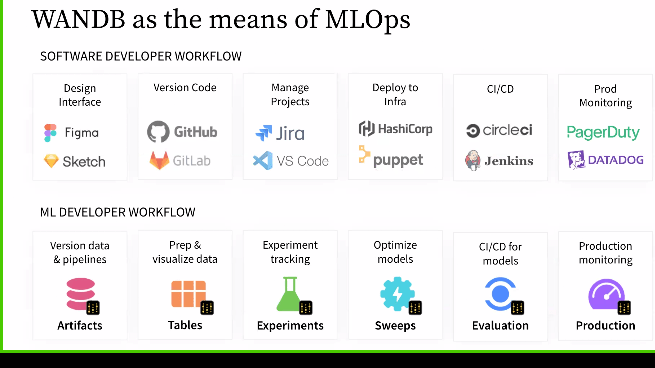

## **Try it yourself guys! its free for personal usage and 100gb**

## ***I was trying to implement first time in tabular data***


# **Steps:**

## **> Part 1: Explore the W and B:**

#### **1. Install and access the W and B**
#### **2. Import data**
#### **3. Statistical analysis**

## **> Part 2: Build Model** 

**Link: https://www.kaggle.com/venkatkumar001/tps-may2022-build-model-w-b-part-2**

#### **1. Build simple sklearn ridge model**
#### **2. Visualize w and b**
#### **3. Predict output**

### **This is overall explore of W&B**


# **PART-1**
# **Import necessary library**

In [ ]:
import gc
import os
import wandb
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings('ignore')

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
#secret_value_0 = user_secrets.get_secret("api_key")
os.environ["WANDB_SILENT"] = "true"


# **Login the w and B and generate key and paste --> access the w and b in kaggle**

In [ ]:
wandb.login()

# **Load Data**

In [ ]:
# Load csv data of this competition.

DATA = "../input/tabular-playground-series-may-2022"
train_df = pd.read_csv(DATA + "/train.csv")
test_df = pd.read_csv(DATA + "/test.csv")

In [ ]:
train_df.shape, test_df.shape

# **Aritifacts:**
Use W&B Artifacts for dataset versioning, model versioning, and tracking dependencies and results across machine learning pipelines. Think of an artifact as a versioned folder of data.

In [ ]:
#W and B Artifacts
run = wandb.init(job_type="dataset-creation")
artifact = wandb.Artifact('my-dataset', type='dataset')
artifact.add_file('../input/tabular-playground-series-may-2022/train.csv')
run.log_artifact(artifact)

# **Create table in WandB**

In [ ]:
#w and b tables
#initialize a new w and b run
train1_df = wandb.Table(dataframe=train_df)
run = wandb.init(project='TPSMAY22')
wandb.log({'train1_df': train1_df})
run.finish()    
run

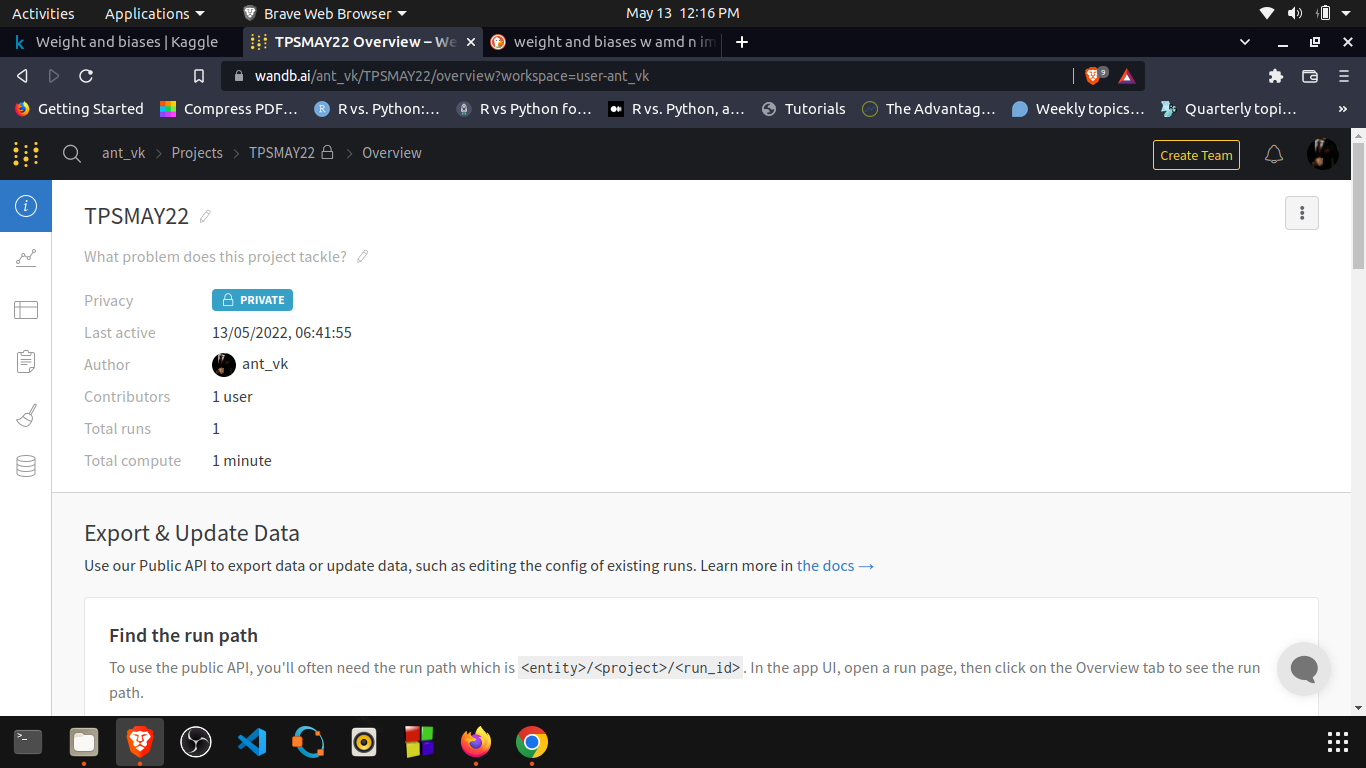

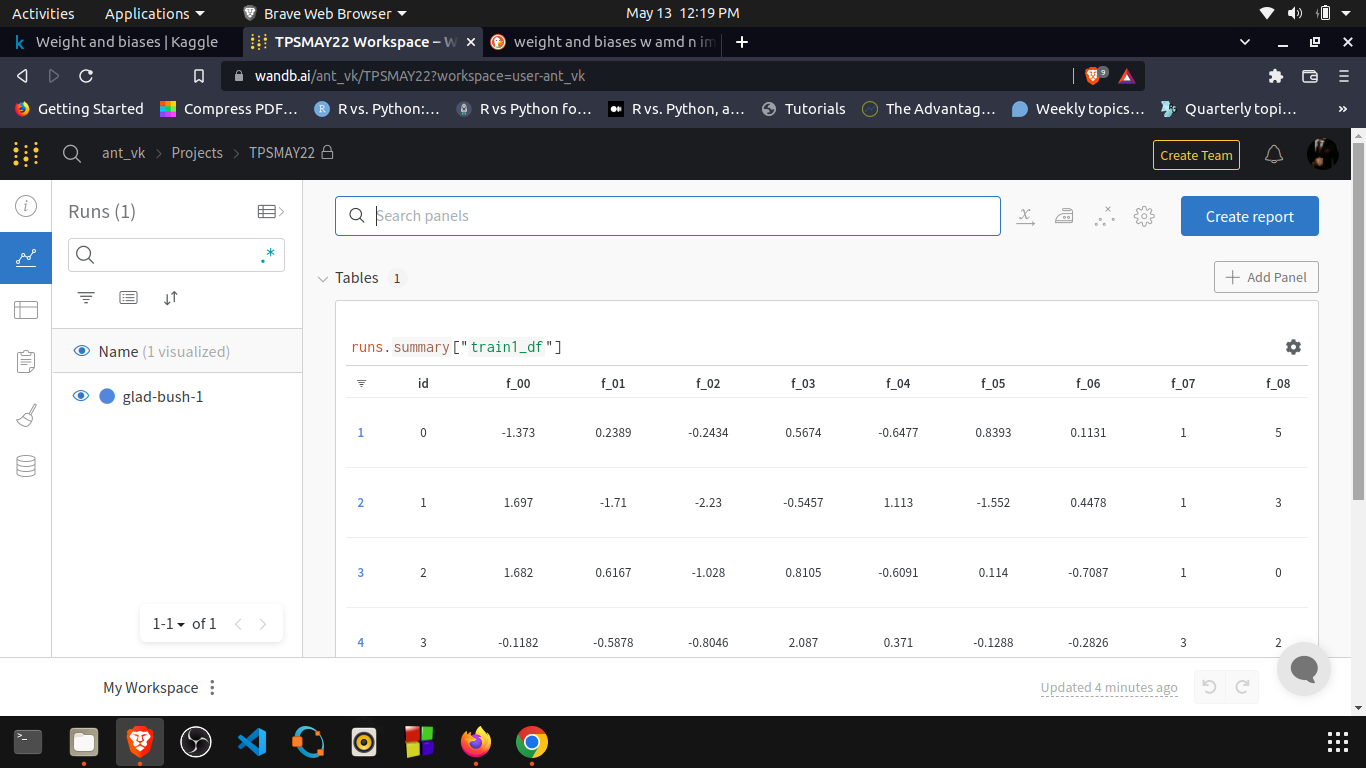

In [ ]:
print('Train_Data')
display(train_df.head())
print('Test_Data')
display(test_df.head())

# **Identify Missing data**

In [ ]:
#Missing data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
%%time
missing_data(train_df)

In [ ]:
%%time
missing_data(test_df)

# **Describe the data**

In [ ]:
%%time
#No missing data
train_df.describe().T.style.bar(subset=['mean'], color='#ea9999')\
                   .background_gradient(subset=['std'], cmap='YlOrBr')

In [ ]:
train_df.shape,test_df.shape

# **Scatter_plot**

In [ ]:
train_df = train_df[:10000]
test_df = test_df[:10000]

In [ ]:
#scatterplot
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+' , color = "#FFB14E")
        plt.xlabel(feature, fontsize=9)
    plt.show();


In [ ]:
features = [feature for feature in train_df.columns if feature not in ['id', 'target','f_27']]
features = features[:16]

In [ ]:
plot_feature_scatter(train_df[::20],test_df[::20], features)

# **Target_Class**

In [ ]:
#Targetclass
run = wandb.init(project='TPSMAY22', job_type='image-visualization',name='Target Feature Count')
targetcount_train = pd.DataFrame(train_df['target'].value_counts())
targetcount_train = targetcount_train.reset_index(drop=False)
targetcount_train.columns = ['TargetClass', 'Count']
table = wandb.Table(data=targetcount_train, columns = ["TargetClass", "Count"])
wandb.log({"my_bar_chart_id" : wandb.plot.bar(table, "TargetClass","Count", title="Target Feature Count")})

run.finish()

run

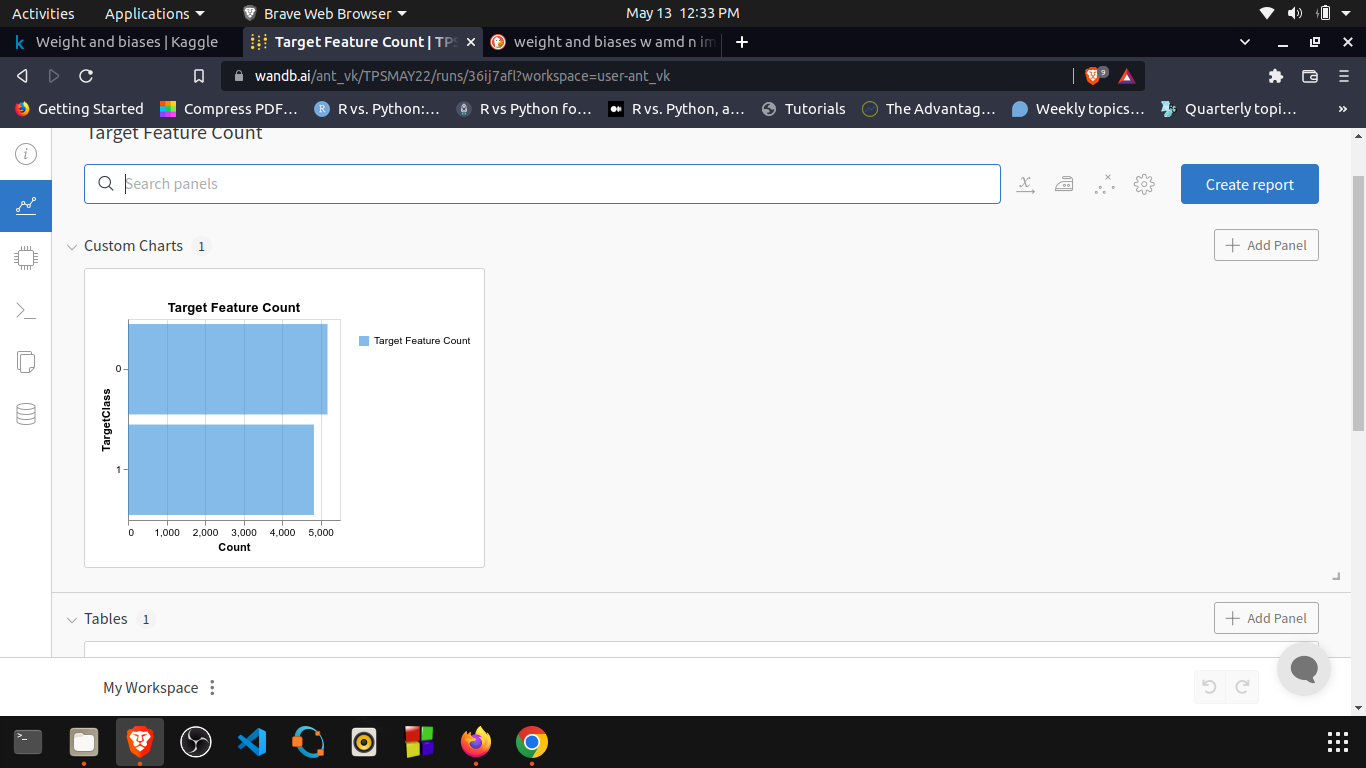

In [ ]:
#Manual
sns.countplot(train_df['target'], palette='Set3')
plt.xticks(rotation=45)

# **Identify Unique values**

In [ ]:
run = wandb.init(project='TPSMAY22', job_type='image-visualization',name='Unique Values')

features = [feature for feature in train_df.columns if feature not in ['id', 'target','f_27']]
unique_values_train = np.zeros(2)
for feature in features:
    temp = train_df[feature].unique()
    unique_values_train = np.concatenate([unique_values_train, temp])
unique_values_train = np.unique(unique_values_train)

unique_value_feature_train = pd.DataFrame(train_df[features].nunique())
unique_value_feature_train = unique_value_feature_train.reset_index(drop=False)
unique_value_feature_train.columns = ['Features', 'Count']

table = wandb.Table(data=unique_value_feature_train, columns = ["Features", "Count"])
wandb.log({"Unique Train Features" : wandb.plot.histogram(table, "Features", title="Unique Train Features")})


run.finish()

run

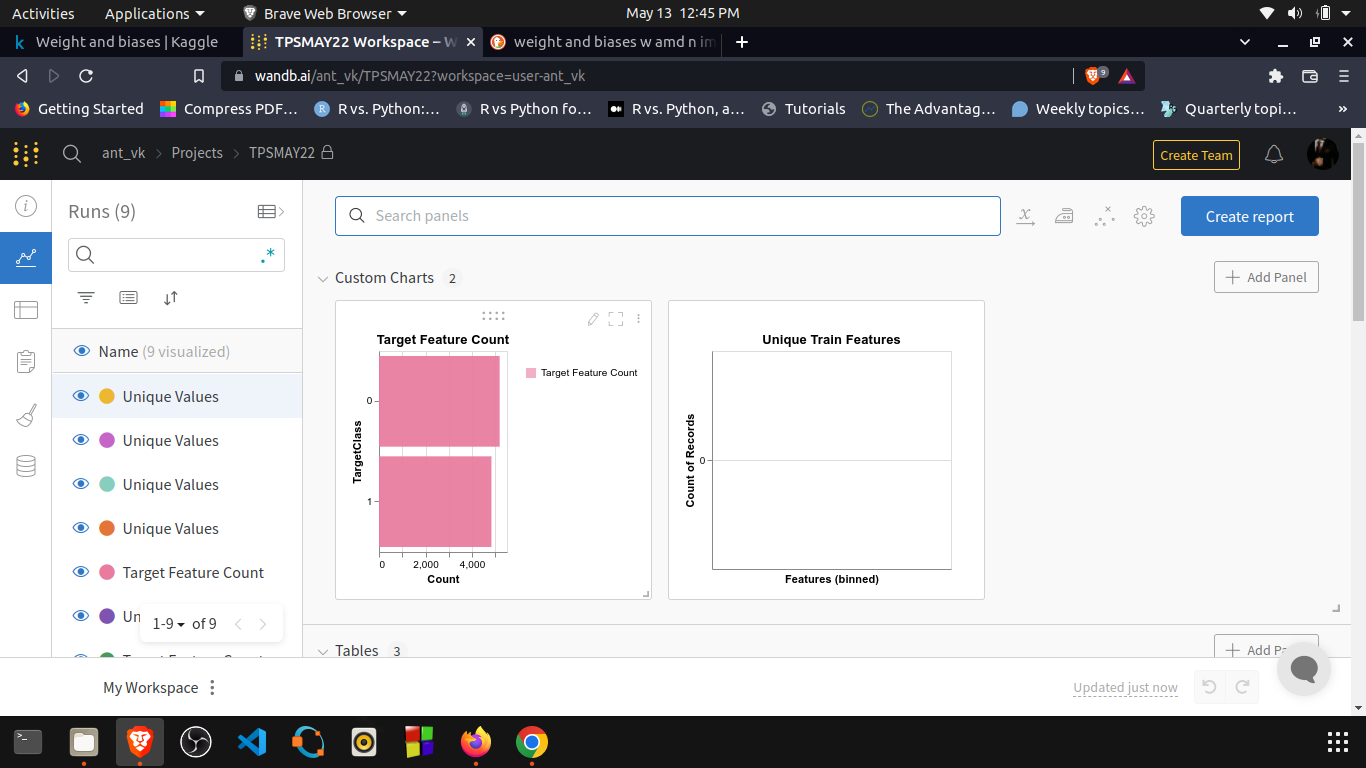

# ***Statistical_Analysis***

# **Density distribution**


In [ ]:
#density plot of features
def plot_feature_distribution(df1,df2,df3,df4,df5,df6,df7,df8,df9,features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(3,3,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(3,3,i)
        sns.distplot(df1[feature], hist=False,label="Class 1")
        sns.distplot(df2[feature], hist=False,label="Class 2")
        sns.distplot(df3[feature], hist=False,label="Class 3")
        sns.distplot(df4[feature], hist=False,label="Class 4")
        sns.distplot(df5[feature], hist=False,label="Class 5")
        sns.distplot(df6[feature], hist=False,label="Class 6")
        sns.distplot(df7[feature], hist=False,label="Class 7")
        sns.distplot(df8[feature], hist=False,label="Class 8")
        sns.distplot(df9[feature], hist=False,label="Class 9")
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.legend()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    
    plt.show();

In [ ]:
features = [feature for feature in train_df.columns if feature not in ['id', 'target','f_27']]
features = features[:9]

# **Distribution of mean values**

In [ ]:
run = wandb.init(project='TPSMAY22', job_type='image-visualization',name='Distribution of mean values')
mean_train = pd.DataFrame(train_df[features].mean())
mean_train = mean_train.reset_index(drop=True)
mean_train.columns = ['MeanDistribution']
table = wandb.Table(data=mean_train, columns = ["MeanDistribution"])
wandb.log({"Distribution of mean values" : wandb.plot.histogram(table, "MeanDistribution", title="Distribution of mean values")})
run.finish()

run

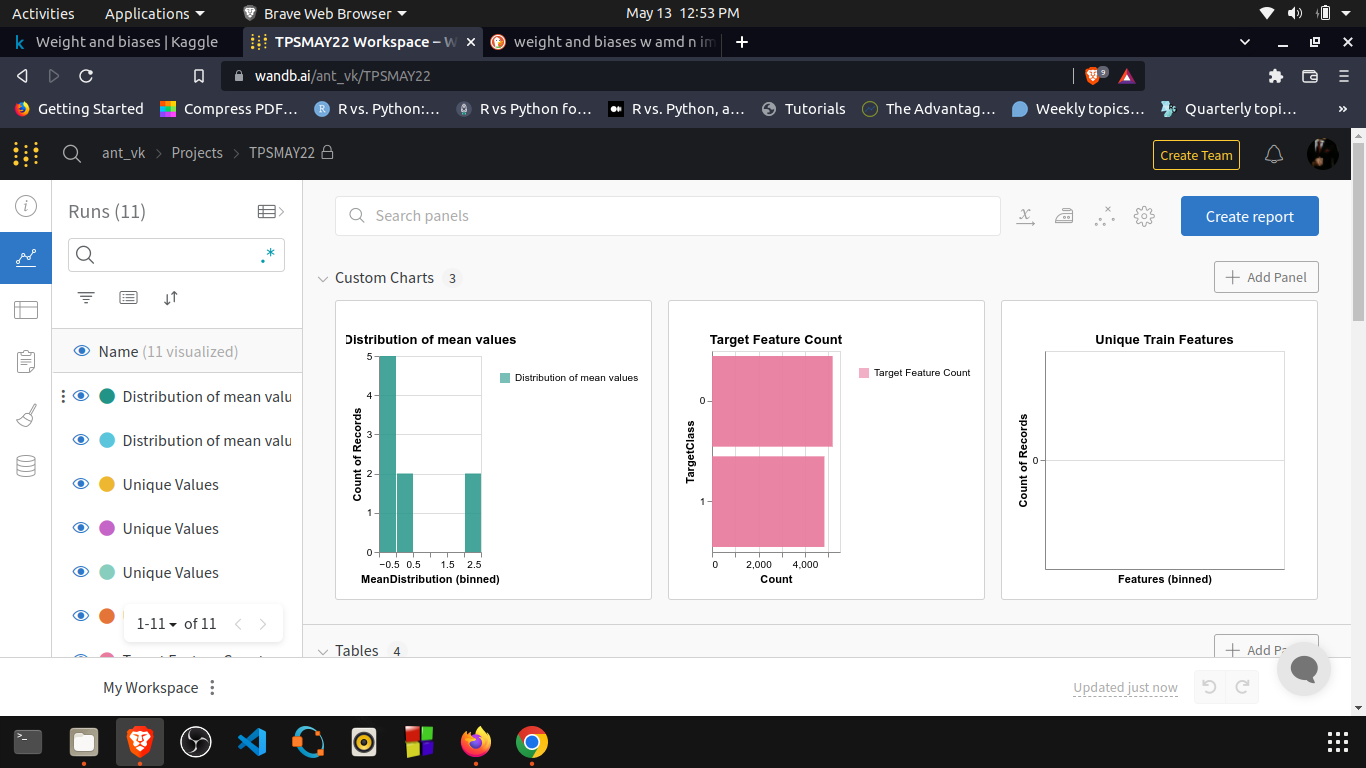

In [ ]:
plt.figure(figsize=(20,18))
plt.title("Distribution of mean values")
sns.distplot(train_df[features].mean(axis=0),color="magenta",kde=True,bins=50, label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=50, label='test')
plt.legend()
plt.show()

In [ ]:
#Standard deviation
plt.figure(figsize=(16,6))
plt.title("Distribution of std values")
sns.distplot(train_df[features].std(),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

# **Distribution of Skewness**

In [ ]:
#skewness
plt.figure(figsize=(16,6))
plt.title("Distribution of skew ")
sns.distplot(train_df[features].skew(),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].skew(),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

In [ ]:
#distribution of kurtosis
plt.figure(figsize=(16,6))
plt.title("Distribution of kurtosis ")
sns.distplot(train_df[features].kurtosis(),color="darkblue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].kurtosis(),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

# **Correlation**

In [ ]:

%%time
#correlation of features
correlations = train_df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)


In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
corr_train = train_df.iloc[:20,1:20]
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr_train.corr().values,linewidths=0.1,vmax=1.0, 
            square=True, cmap='hot_r', linecolor='white', annot=True)

In [ ]:

%%time
#checking for duplicate values
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train_df[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test_df[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [ ]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

## **⭐️⭐️Thank you for visiting guys⭐️⭐️**

**Reference: Full_credit-This Notebook_Content**

1. https://www.kaggle.com/code/usharengaraju/tps-june-weights-and-biases
2. https://docs.wandb.ai/guides/integrations/scikit

## **Part-2: https://www.kaggle.com/code/venkatkumar001/tps-may2022-build-model-w-b-part-2**
